# Visualize Coordinate Data

This notebook loads and visualizes coordinate data from `data1/clean_data.npz`, plotting x and y coordinates on a 2D plot.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
%matplotlib inline


## Visualize Noisy Data


In [12]:
# Load the noisy data
noisy_data_path = Path("../data1/noisy_data.npz")

if not noisy_data_path.exists():
    print(f"Error: File {noisy_data_path} not found!")
else:
    noisy_data = np.load(noisy_data_path)
    print(f"Noisy data file contains {len(noisy_data.files)} arrays:")
    for key in noisy_data.files:
        array = noisy_data[key]
        print(f"  {key}: shape={array.shape}, dtype={array.dtype}")
        print(f"    Min: {array.min():.4f}, Max: {array.max():.4f}, Mean: {array.mean():.4f}")


Noisy data file contains 2 arrays:
  x: shape=(800, 1), dtype=float32
    Min: -3.1404, Max: 3.1385, Mean: 0.0886
  y: shape=(800, 1), dtype=float32
    Min: -0.9235, Max: 1.6078, Mean: 0.2331


Found x coordinates: x
Found y coordinates: y


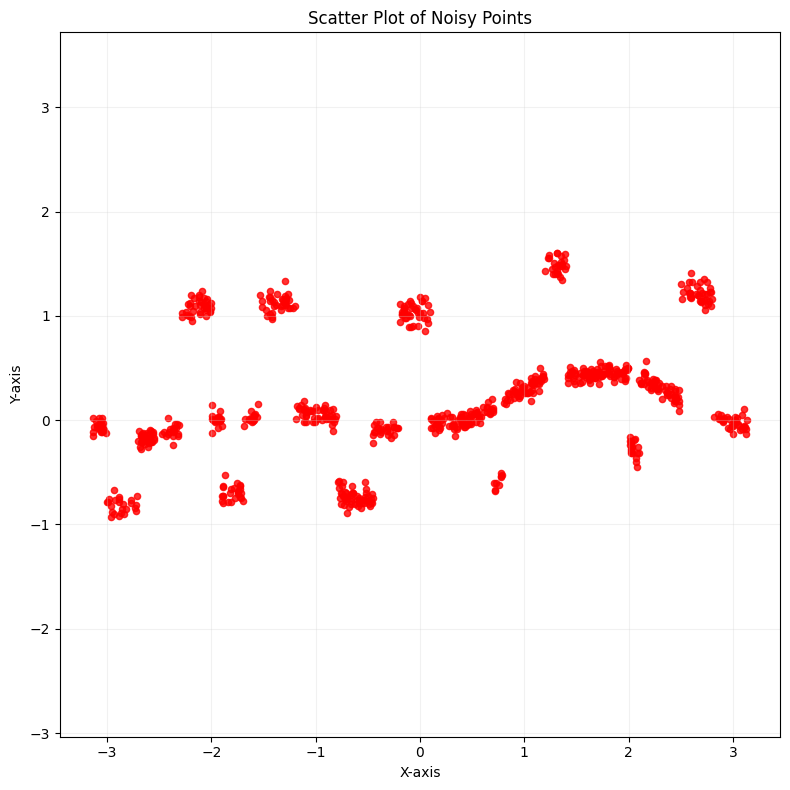


Noisy Data Statistics:
X coordinates - Min: -3.1404, Max: 3.1385, Mean: 0.0886
Y coordinates - Min: -0.9235, Max: 1.6078, Mean: 0.2331
Total points: 800


In [13]:
# Create a simple scatter plot for noisy data with automatic scaling
if 'noisy_data' in locals():
    # Try to identify x and y coordinates
    x_noisy = None
    y_noisy = None
    
    # Look for common coordinate names
    for key in noisy_data.files:
        if 'x' in key.lower() or key.lower() in ['x', 'x_coords', 'x_coordinates']:
            x_noisy = noisy_data[key]
            print(f"Found x coordinates: {key}")
        elif 'y' in key.lower() or key.lower() in ['y', 'y_coords', 'y_coordinates']:
            y_noisy = noisy_data[key]
            print(f"Found y coordinates: {key}")
    
    # If no specific x,y found, assume first two arrays are coordinates
    if x_noisy is None or y_noisy is None:
        arrays = [noisy_data[key] for key in noisy_data.files]
        if len(arrays) >= 2:
            x_noisy = arrays[0]
            y_noisy = arrays[1]
            print(f"Using first two arrays as x,y coordinates")
            print(f"X data shape: {x_noisy.shape}")
            print(f"Y data shape: {y_noisy.shape}")
    
    if x_noisy is not None and y_noisy is not None:
        # Ensure both arrays have the same length
        min_length = min(len(x_noisy), len(y_noisy))
        x_noisy_plot = x_noisy[:min_length]
        y_noisy_plot = y_noisy[:min_length]
        
        # Create a simple, clean scatter plot with automatic scaling
        plt.figure(figsize=(8, 8))
        plt.scatter(x_noisy_plot, y_noisy_plot, c='red', s=20, alpha=0.8)
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Scatter Plot of Noisy Points')
        plt.grid(True, alpha=0.3, color='lightgray')
        
        # Auto-scale to fit all points with some padding
        x_margin = (x_noisy_plot.max() - x_noisy_plot.min()) * 0.05
        y_margin = (y_noisy_plot.max() - y_noisy_plot.min()) * 0.05
        
        plt.xlim(x_noisy_plot.min() - x_margin, x_noisy_plot.max() + x_margin)
        plt.ylim(y_noisy_plot.min() - y_margin, y_noisy_plot.max() + y_margin)
        
        # Set equal aspect ratio to prevent distortion
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        
        # Print coordinate statistics
        print(f"\nNoisy Data Statistics:")
        print(f"X coordinates - Min: {x_noisy_plot.min():.4f}, Max: {x_noisy_plot.max():.4f}, Mean: {x_noisy_plot.mean():.4f}")
        print(f"Y coordinates - Min: {y_noisy_plot.min():.4f}, Max: {y_noisy_plot.max():.4f}, Mean: {y_noisy_plot.mean():.4f}")
        print(f"Total points: {len(x_noisy_plot)}")
        
    else:
        print("Could not identify x,y coordinate data in noisy data")


In [14]:
# Close the noisy data file when done
if 'noisy_data' in locals():
    noisy_data.close()
    print("Noisy data file closed.")


Noisy data file closed.


In [15]:
# Load the coordinate data
data_path = Path("../data1/clean_data.npz")

if not data_path.exists():
    print(f"Error: File {data_path} not found!")
else:
    data = np.load(data_path)
    print(f"Data file contains {len(data.files)} arrays:")
    for key in data.files:
        array = data[key]
        print(f"  {key}: shape={array.shape}, dtype={array.dtype}")
        print(f"    Min: {array.min():.4f}, Max: {array.max():.4f}, Mean: {array.mean():.4f}")


Data file contains 2 arrays:
  x: shape=(8000, 1), dtype=float32
    Min: -3.1409, Max: 3.1416, Mean: -0.0104
  y: shape=(8000, 1), dtype=float32
    Min: -0.1632, Max: 0.4467, Mean: 0.0877


## 2D Coordinate Plotting


Found x coordinates: x
Found y coordinates: y


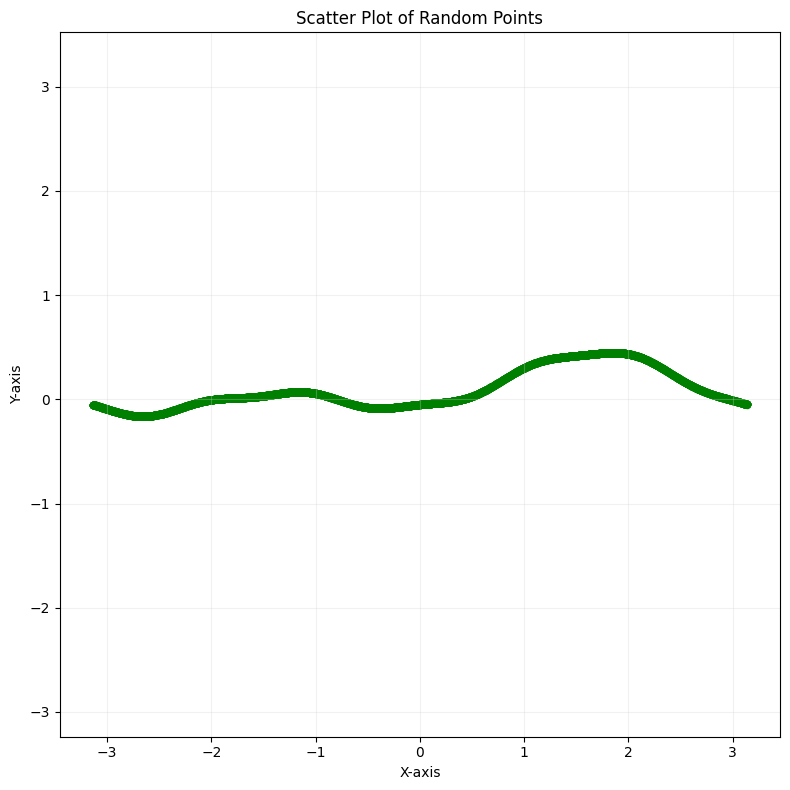


Coordinate Statistics:
X coordinates - Min: -3.1409, Max: 3.1416, Mean: -0.0104
Y coordinates - Min: -0.1632, Max: 0.4467, Mean: 0.0877
Total points: 8000


In [16]:
# Create a simple scatter plot like the image
if 'data' in locals():
    # Try to identify x and y coordinates
    x_data = None
    y_data = None
    
    # Look for common coordinate names
    for key in data.files:
        if 'x' in key.lower() or key.lower() in ['x', 'x_coords', 'x_coordinates']:
            x_data = data[key]
            print(f"Found x coordinates: {key}")
        elif 'y' in key.lower() or key.lower() in ['y', 'y_coords', 'y_coordinates']:
            y_data = data[key]
            print(f"Found y coordinates: {key}")
    
    # If no specific x,y found, assume first two arrays are coordinates
    if x_data is None or y_data is None:
        arrays = [data[key] for key in data.files]
        if len(arrays) >= 2:
            x_data = arrays[0]
            y_data = arrays[1]
            print(f"Using first two arrays as x,y coordinates")
            print(f"X data shape: {x_data.shape}")
            print(f"Y data shape: {y_data.shape}")
    
    if x_data is not None and y_data is not None:
        # Ensure both arrays have the same length
        min_length = min(len(x_data), len(y_data))
        x_plot = x_data[:min_length]
        y_plot = y_data[:min_length]
        
        # Create a simple, clean scatter plot with automatic scaling
        plt.figure(figsize=(8, 8))
        plt.scatter(x_plot, y_plot, c='green', s=20, alpha=0.8)
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Scatter Plot of Random Points')
        plt.grid(True, alpha=0.3, color='lightgray')
        
        # Auto-scale to fit all points with some padding
        x_margin = (x_plot.max() - x_plot.min()) * 0.05
        y_margin = (y_plot.max() - y_plot.min()) * 0.05
        
        plt.xlim(x_plot.min() - x_margin, x_plot.max() + x_margin)
        plt.ylim(y_plot.min() - y_margin, y_plot.max() + y_margin)
        
        # Set equal aspect ratio to prevent distortion
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        
        # Print coordinate statistics
        print(f"\nCoordinate Statistics:")
        print(f"X coordinates - Min: {x_plot.min():.4f}, Max: {x_plot.max():.4f}, Mean: {x_plot.mean():.4f}")
        print(f"Y coordinates - Min: {y_plot.min():.4f}, Max: {y_plot.max():.4f}, Mean: {y_plot.mean():.4f}")
        print(f"Total points: {len(x_plot)}")
        
    else:
        print("Could not identify x,y coordinate data")


In [17]:
# Close the data file when done
if 'data' in locals():
    data.close()
    print("Data file closed.")


Data file closed.


## Combined Visualization: Clean vs Noisy Data


In [21]:
# Load both clean and noisy data for combined visualization
clean_path = Path("../data1/clean_data.npz")
noisy_path = Path("../data1/noisy_data.npz")

# Load clean data
if clean_path.exists():
    clean_data = np.load(clean_path)
    print("Clean data loaded successfully")
else:
    print("Clean data file not found!")
    clean_data = None

# Load noisy data
if noisy_path.exists():
    noisy_data = np.load(noisy_path)
    print("Noisy data loaded successfully")
else:
    print("Noisy data file not found!")
    noisy_data = None


Clean data loaded successfully
Noisy data loaded successfully


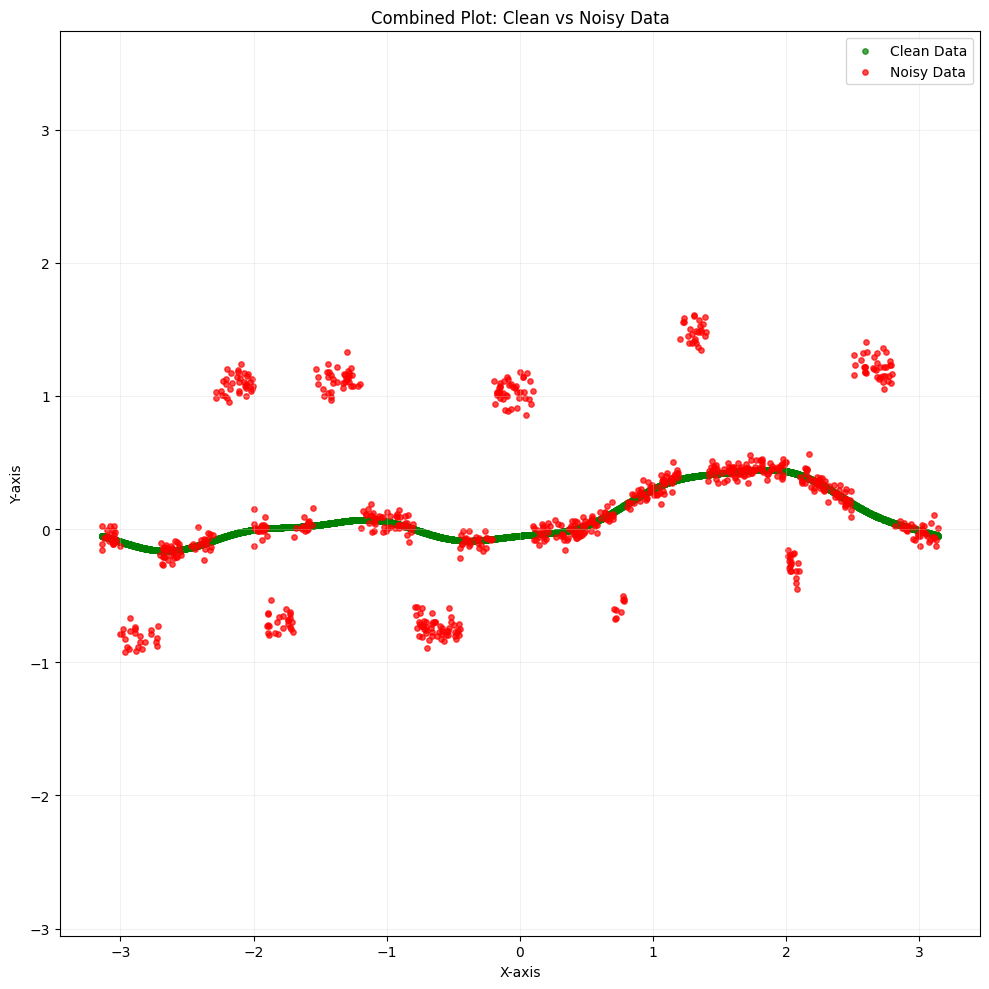


Combined Data Statistics:
Clean data points: 8000
Noisy data points: 800
Total points: 8800

Clean data range:
  X: -3.1409 to 3.1416
  Y: -0.1632 to 0.4467

Noisy data range:
  X: -3.1404 to 3.1385
  Y: -0.9235 to 1.6078


In [22]:
# Create combined scatter plot: Clean (green) vs Noisy (red)
if clean_data is not None and noisy_data is not None:
    # Extract coordinates from both datasets
    clean_x = clean_data['x']
    clean_y = clean_data['y']
    noisy_x = noisy_data['x']
    noisy_y = noisy_data['y']
    
    # Create the combined plot
    plt.figure(figsize=(10, 10))
    
    # Plot clean data as green dots
    plt.scatter(clean_x, clean_y, c='green', s=15, alpha=0.7, label='Clean Data')
    
    # Plot noisy data as red dots
    plt.scatter(noisy_x, noisy_y, c='red', s=15, alpha=0.7, label='Noisy Data')
    
    # Set labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Combined Plot: Clean vs Noisy Data')
    plt.legend()
    plt.grid(True, alpha=0.3, color='lightgray')
    
    # Auto-scale to fit all points from both datasets
    all_x = np.concatenate([clean_x, noisy_x])
    all_y = np.concatenate([clean_y, noisy_y])
    
    x_margin = (all_x.max() - all_x.min()) * 0.05
    y_margin = (all_y.max() - all_y.min()) * 0.05
    
    plt.xlim(all_x.min() - x_margin, all_x.max() + x_margin)
    plt.ylim(all_y.min() - y_margin, all_y.max() + y_margin)
    
    # Set equal aspect ratio to prevent distortion
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # Print combined statistics
    print(f"\nCombined Data Statistics:")
    print(f"Clean data points: {len(clean_x)}")
    print(f"Noisy data points: {len(noisy_x)}")
    print(f"Total points: {len(clean_x) + len(noisy_x)}")
    print(f"\nClean data range:")
    print(f"  X: {clean_x.min():.4f} to {clean_x.max():.4f}")
    print(f"  Y: {clean_y.min():.4f} to {clean_y.max():.4f}")
    print(f"\nNoisy data range:")
    print(f"  X: {noisy_x.min():.4f} to {noisy_x.max():.4f}")
    print(f"  Y: {noisy_y.min():.4f} to {noisy_y.max():.4f}")
    
else:
    print("Could not load both datasets for comparison")


In [23]:
# Close the data files
if clean_data is not None:
    clean_data.close()
    print("Clean data file closed.")

if noisy_data is not None:
    noisy_data.close()
    print("Noisy data file closed.")


Clean data file closed.
Noisy data file closed.
